# Neural networks for curve fitting

In [198]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [199]:
# Define the function
f = lambda x: (1 - x) * np.sin(2 * x) + (1 - x) ** 2 * np.sin(10 * x)
x = np.linspace(0, 1, 101)

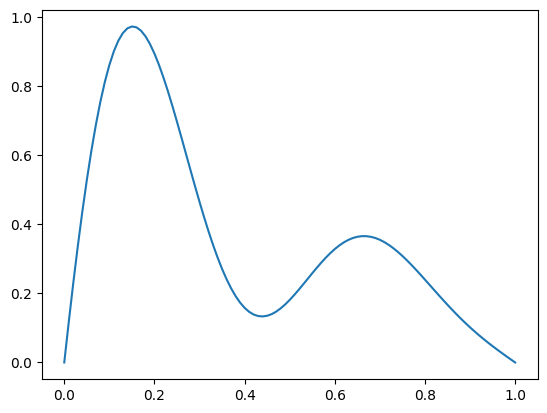

In [200]:
plt.plot(x, f(x))
plt.show()

In [201]:
coarsening = 10

x_low = np.expand_dims(x[::coarsening], axis=1)
x_high = np.expand_dims(x, axis=1)
y_low = f(x_low)
y_high = f(x_high)

## Build the Neural Network

In [202]:
n_units = 16

inp = tf.keras.layers.Input(shape=(1,))
x = tf.keras.layers.Dense(n_units, activation="relu")(inp)
x = tf.keras.layers.Dense(n_units, activation="relu")(x)
x = tf.keras.layers.Dense(n_units, activation="relu")(x)
x = tf.keras.layers.Dense(n_units, activation="relu")(x)
x = tf.keras.layers.Dense(n_units, activation="relu")(x)
x = tf.keras.layers.Dense(n_units, activation="relu")(x)
x = tf.keras.layers.Dense(n_units, activation="relu")(x)
out = tf.keras.layers.Dense(1, activation="linear")(x)

model = tf.keras.Model(inp, out)

In [209]:
model.compile(optimizer="adam", loss="mse", metrics="acc")

history = model.fit(x_low, y_low, batch_size=1, epochs=80, validation_split=0.2)

Epoch 1/80
8/8 [==============================] - 0s 12ms/step - loss: 0.0015 - acc: 0.1250 - val_loss: 0.0500 - val_acc: 0.3333
Epoch 2/80
8/8 [==============================] - 0s 3ms/step - loss: 0.0130 - acc: 0.1250 - val_loss: 0.0953 - val_acc: 0.3333
Epoch 3/80
8/8 [==============================] - 0s 3ms/step - loss: 0.0074 - acc: 0.1250 - val_loss: 0.1156 - val_acc: 0.3333
Epoch 4/80
8/8 [==============================] - 0s 3ms/step - loss: 0.0047 - acc: 0.1250 - val_loss: 0.0729 - val_acc: 0.3333
Epoch 5/80
8/8 [==============================] - 0s 3ms/step - loss: 0.0025 - acc: 0.1250 - val_loss: 0.0800 - val_acc: 0.3333
Epoch 6/80
8/8 [==============================] - 0s 3ms/step - loss: 0.0027 - acc: 0.1250 - val_loss: 0.1072 - val_acc: 0.3333
Epoch 7/80
8/8 [==============================] - 0s 3ms/step - loss: 0.0016 - acc: 0.1250 - val_loss: 0.0831 - val_acc: 0.3333
Epoch 8/80
8/8 [==============================] - 0s 2ms/step - loss: 5.8005e-04 - acc: 0.1250 - val_lo

In [212]:
y_pred = model.predict(x_high)
model.evaluate(y_high,y_pred)

4/4 [==============================] - 0s 1ms/step - loss: 0.2149 - acc: 0.0000e+00


[0.2148866504430771, 0.0]

In [213]:
hist = pd.DataFrame(history.history)
hist.tail()

,loss,acc,val_loss,val_acc
75,0.000665,0.125,0.058248,0.333333
76,0.000500,0.125,0.050842,0.333333
77,0.000520,0.125,0.051247,0.333333
78,0.000313,0.125,0.045544,0.333333
79,0.000227,0.125,0.040167,0.333333


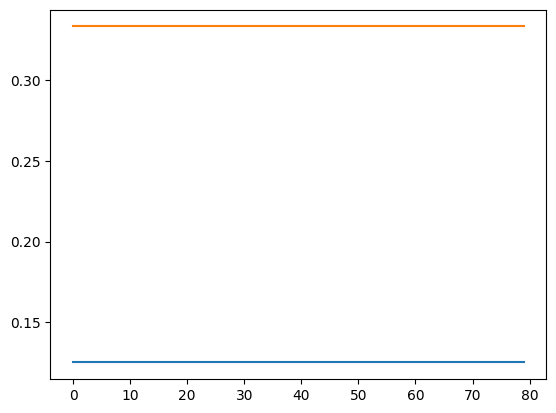

In [214]:
plt.plot(hist.acc)
plt.plot(hist.val_acc)
plt.show()

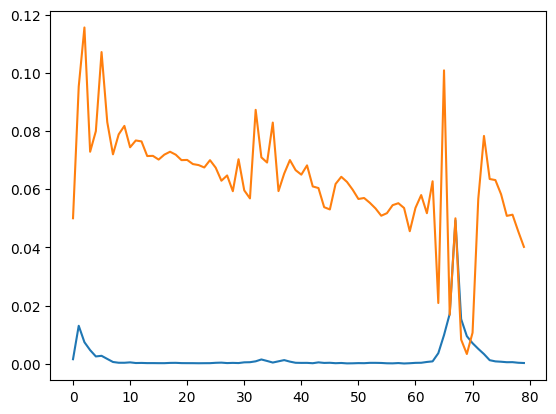

In [215]:
plt.plot(hist.loss)
plt.plot(hist.val_loss)
plt.show()

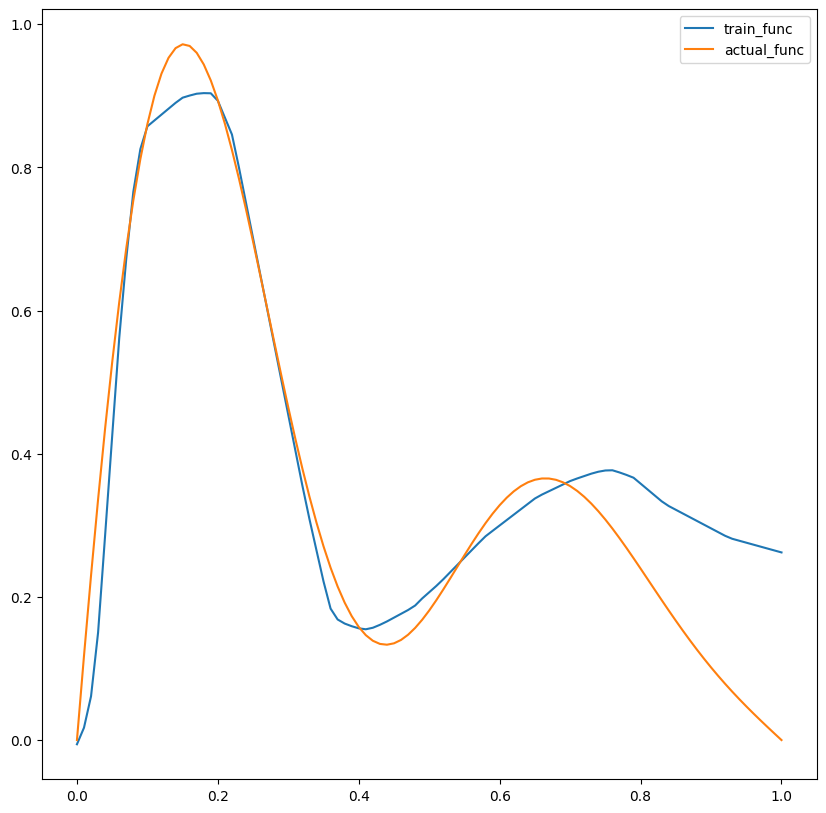

In [216]:
plt.figure(figsize=(10,10))
plt.plot(x_high, y_pred, label="train_func")
plt.plot(x_high, y_high, label="actual_func")
plt.legend()
plt.show()